<a href="https://colab.research.google.com/github/ayuti/Employee_Retention/blob/main/retention_employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Business Scenario and Problem
<br>The HR department at Salifort Motors, a large ficticious consulting firm, has asked us to conduct an in-depth analysis of employee retention and to develop a predictive model that can help us predict whether employees will be retained or depart. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company and building a robust model would help in identifying factors that would improve retention. Therefore, the goal is to provide our stakeholders with a 1-page summary that outlines the findings of our analysis and the implications for the firm.


satisfaction_level=Employee-reported job satisfaction level [0–1]
<br>last_evaluation=Score of employee's last performance review [0–1]
<br>number_project=Number of projects employee contributes to
<br>average_monthly_hours=Average number of hours employee worked per month
<br>time_spend_company=How long the employee has been with the company (years)
<br>Work_accident=Whether or not the employee experienced an accident while at work
<br>left=Whether or not the employee left the company
<br>promotion_last_5years=Whether or not the employee was promoted in the last 5 years
<br>Department=The employee's department
<br>salary=The employee's salary (U.S. dollars)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib.ticker as mtick


In [ ]:
df=pd.read_csv('HR_comma_sep.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
emp_data = df.rename(columns = {'Work_accident': 'accident',
                          'average_montly_hours': 'hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department',
                          'number_project': 'num_project',
                          'promotion_last_5years': 'promotion',
                          'last_evaluation': 'eval'})
emp_data.head()


,satisfaction_level,eval,num_project,hours,tenure,accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Null values

In [ ]:
emp_data.isna().sum()


satisfaction_level    0
eval                  0
num_project           0
hours                 0
tenure                0
accident              0
left                  0
promotion             0
department            0
salary                0
dtype: int64

Duplicates

In [ ]:
print('Amount of duplicates: {:,}'.format(emp_data.duplicated().sum()))
print('Percent of duplicates: {:.1%}'.format(emp_data.duplicated().mean()))


Amount of duplicates: 3,008
Percent of duplicates: 20.1%


In [ ]:
emp_data[emp_data.duplicated()]


,satisfaction_level,eval,num_project,hours,tenure,accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
emp_data1 = emp_data.drop_duplicates(keep = 'first').reset_index(drop = 'index')
emp_data1.head()


,satisfaction_level,eval,num_project,hours,tenure,accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


It's very unlikely for duplicated rows to be different employees considering the number of features, therefore duplicates were dropped.

Check Outliers

In [ ]:
def detect_outliers(emp_data1, column_names):
    '''
    Detect outliers in the specified columns of a DataFrame and visualize them using boxplots.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_names (list): A list of column names to analyze for outliers.

    Returns:
        pd.DataFrame: A DataFrame containing outlier information for each column.

    The function calculates the first quartile (Q1) and third quartile (Q3) for each column,
    then computes the interquartile range (IQR) and defines lower and upper limits for outlier detection.
    The function then creates boxplots for each specified column and marks the lower and upper limits as red dashed lines.
    Outliers are identified and displayed in the boxplots.
    The function also returns a DataFrame with information about the number of outliers and their percentage for each column.
    '''
    num_columns = min(len(column_names), 3)
    num_rows = (len(column_names) + num_columns - 1) // num_columns
    outlier_data = []  # To store outlier information for each column

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 5 * num_rows))

    for i, column_name in enumerate(column_names[:num_rows * num_columns]):
        data = emp_data1[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        low_lim = q1 - 1.5 * iqr
        upp_lim = q3 + 1.5 * iqr

        # Find and display outliers
        outliers = emp_data1[(data < low_lim) | (data > upp_lim)][column_name]
        num_outliers = len(outliers)
        percent_outliers = round(num_outliers / len(emp_data1) * 100, 1)

        outlier_data.append([column_name, num_outliers, percent_outliers, round(low_lim, 1), round(upp_lim, 1)])

        # Create a boxplot to visualize the distribution and detect any outliers
        sns.boxplot(x = data, ax = axes[i // num_columns, i % num_columns])
        axes[i // num_columns, i % num_columns].set_title(column_name.capitalize())
        axes[i // num_columns, i % num_columns].set_xlabel(column_name)
        axes[i // num_columns, i % num_columns].axvline(low_lim, color = 'red', linestyle = '--', label = f'Lower Limit: {low_lim:.1f}')
        axes[i // num_columns, i % num_columns].axvline(upp_lim, color = 'red', linestyle = '--', label = f'Upper Limit: {upp_lim:.1f}')
        axes[i // num_columns, i % num_columns].legend()

    plt.tight_layout()
    plt.show()

    # Combine the outlier information into a DataFrame
    outlier_df = pd.DataFrame(outlier_data, columns = ['Column', 'Number of Outliers', '% Outliers', 'Lower Limit', 'Upper Limit'])
    return outlier_df

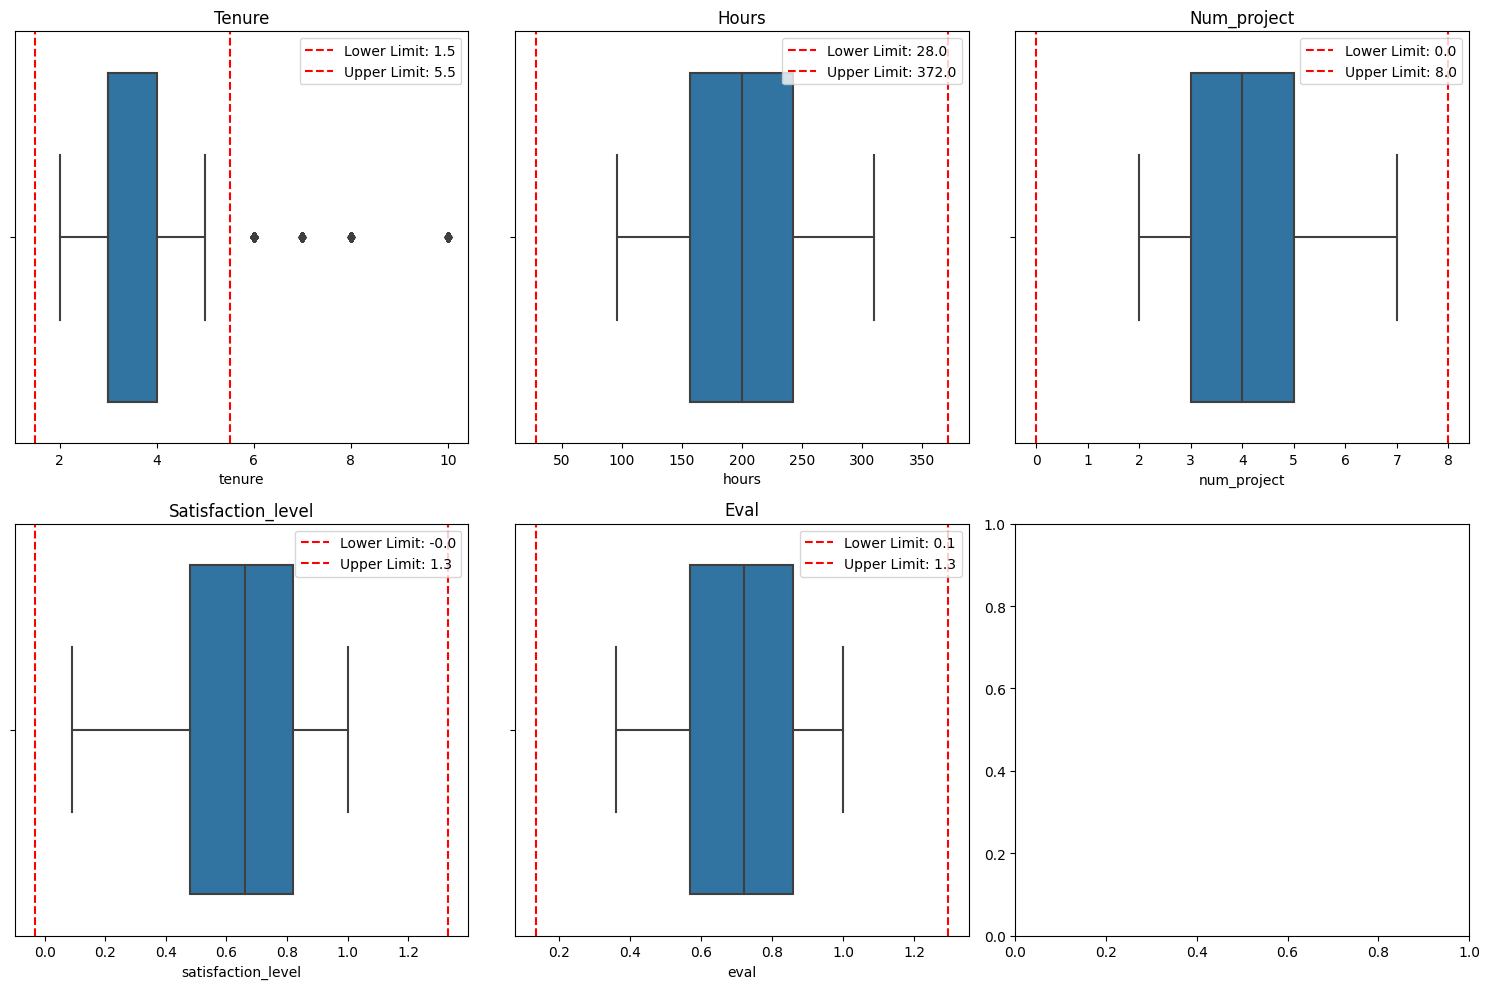

,Column,Number of Outliers,% Outliers,Lower Limit,Upper Limit
0,tenure,824,6.9,1.5,5.5
1,hours,0,0.0,28.0,372.0
2,num_project,0,0.0,0.0,8.0
3,satisfaction_level,0,0.0,-0.0,1.3
4,eval,0,0.0,0.1,1.3


In [ ]:
# Add the column names you want to plot
columns_to_plot = ['tenure', 'hours', 'num_project', 'satisfaction_level', 'eval']
detect_outliers(emp_data1, columns_to_plot)

##**Univariate** **Analysis**

In [ ]:
emp_data1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [ ]:
emp_data1['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

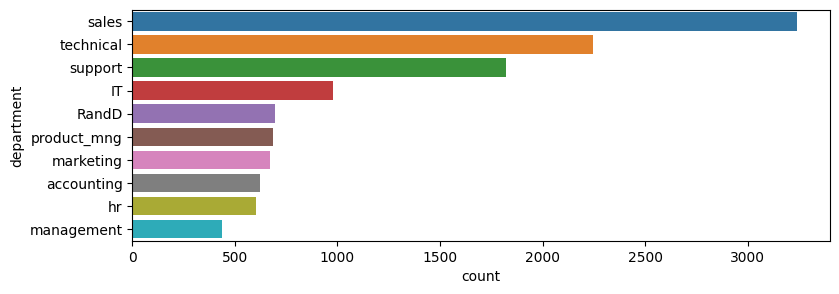

In [ ]:
plt.figure(figsize=(9,3))
sns.countplot(y='department', data=emp_data1,order=emp_data1['department'].value_counts().index)
plt.show()


In [ ]:
emp_data1['left'].value_counts(normalize=True)*100


0    83.39588
1    16.60412
Name: left, dtype: float64

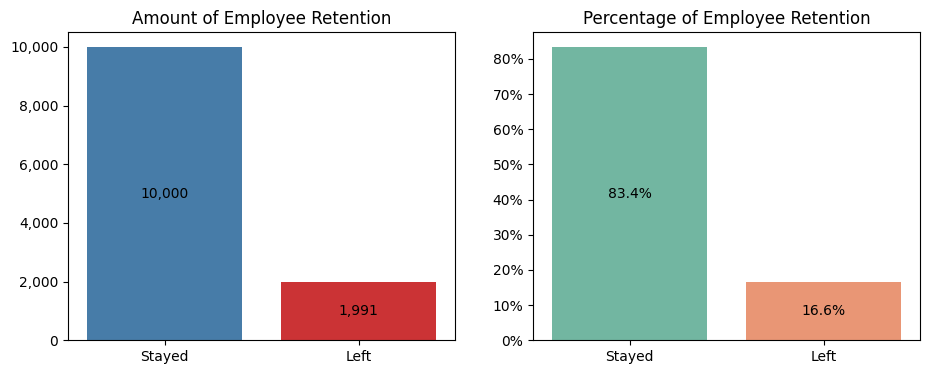

In [ ]:
# Get counts and percentages of people who left vs. stayed
count_df = emp_data1['left'].value_counts()
per_df = emp_data1['left'].value_counts(normalize = True)

fig, ax = plt.subplots(1, 2, figsize = (11, 4))
label = ['Stayed', 'Left']
color_c = sns.color_palette('Set1', n_colors = len(label))[::-1]
color_p = sns.color_palette('Set2', n_colors = len(label))

# Plot the bar chart for employee retention count
sns.barplot(x = label, y = count_df.values, palette = color_c, ax = ax[0])
ax[0].set_title('Amount of Employee Retention')
ax[0].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Display values on top of each bar
for i, v in enumerate(count_df.values):
    ax[0].text(i, v/2, '{:,}'.format(v), ha = 'center', va = 'center')

# Plot the bar chart for employee retention count as a percentage
sns.barplot(x = label, y = per_df.values, palette = color_p, ax = ax[1])
ax[1].set_title('Percentage of Employee Retention')
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

# Display values on top of each bar
for i, v in enumerate(per_df.values):
    ax[1].text(i, v/2, '{:.1%}'.format(v), ha = 'center', va = 'center')

plt.show()

The ratio bewteen retained and exited employes is about 5:1, which is not ideal considering 5 employees would stay while 1 leaves. However, that is what we're trying to predict and address with our model! Also notable is the huge inbalance in the data, having less than 17% positive in the data. Using a precision-recall curve would be more appropriate to measure our metrics at the end of model building.



In [ ]:
emp_data1['num_project'].value_counts(normalize=True)*100

4    30.731382
3    29.355350
5    18.622300
2    13.193228
6     6.888500
7     1.209240
Name: num_project, dtype: float64

In [ ]:
emp_data1['tenure'].value_counts(normalize=True)*100

3     43.282462
2     24.268201
4     16.720874
5      8.856642
6      4.520057
10     0.892336
7      0.783921
8      0.675507
Name: tenure, dtype: float64

In [ ]:
emp_data1['accident'].value_counts(normalize=True)*100

0    84.571762
1    15.428238
Name: accident, dtype: float64

In [ ]:
emp_data1['promotion'].value_counts(normalize=True)*100

0    98.307064
1     1.692936
Name: promotion, dtype: float64

Feature Selection

We are now ready to analyze which features would be good predictors for employees leaving. A quick way to do this is by "pivoting" pairs of features, as below. Pivoting shows the average rate of leaving per band of categorical variable. Note that I analyzed the number of projects worked feature and the time spent in the firm feature here, even though both are technically numerical variables. This is because these variables contain only a few discrete values.



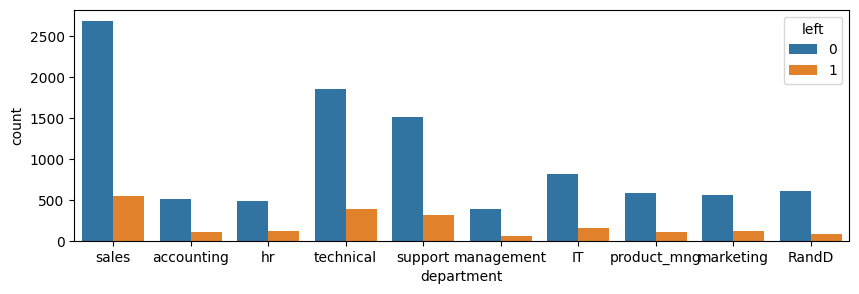

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(x='department',hue='left',data=emp_data1)
plt.show()

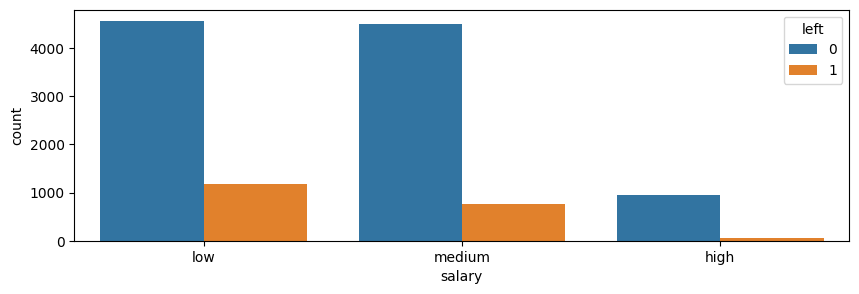

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(x='salary',hue='left',data=emp_data1)
plt.show()

In [ ]:
emp_data1[['accident', 'left']].groupby(['accident'], as_index=False).mean().sort_values(by='left')


,accident,left
1,1,0.056757
0,0,0.185978


In [ ]:
emp_data1[['department', 'left']].groupby(['department'], as_index=False).mean().sort_values(by='left', ascending=False)


,department,left
3,hr,0.188020
2,accounting,0.175523
9,technical,0.173797
8,support,0.171334
7,sales,0.169805
5,marketing,0.166419
0,IT,0.161885
6,product_mng,0.160350
1,RandD,0.122478
4,management,0.119266


In [ ]:
emp_data1[['salary', 'left']].groupby(['salary'], as_index=False).mean().sort_values(by='left', ascending=False)


,salary,left
1,low,0.204530
2,medium,0.146170
0,high,0.048485


In [ ]:
emp_data1[['num_project', 'left']].groupby(['num_project'], as_index=False).mean().sort_values(by='num_project')


,num_project,left
0,2,0.541719
1,3,0.010795
2,4,0.064315
3,5,0.153605
4,6,0.449153
5,7,1.000000


In [ ]:
emp_data1[['tenure', 'left']].groupby(['tenure'], as_index=False).mean().sort_values(by='tenure')


,tenure,left
0,2,0.010653
1,3,0.168401
2,4,0.246883
3,5,0.453861
4,6,0.201107
5,7,0.000000
6,8,0.000000
7,10,0.000000


Observations:
<br>having an accident at work does not necessarily correlate strongly with leaving the firm (8% of those who had accidents left while 26% of those who did not have accidents left)
<br>R&D and management depts seem to experience the least turnover, while the other departments have similar turnover rates
<br>Salary seems inversely correlated with how likely someone will leave
People tend to leave when they're on a few projects or many projects. <br>This clustering effect is seen later in a few of the other numeric variables as well.
<br>Workers are more likely to leave once they've spent a few years at the firm, but after 7 years everyone has stayed

<br>Conclusions:
<br>We should not consider the Work_accident feature in our model
<br>The department feature does not seem that useful, given the similar rates between departments. However, we can leave it in for now
<br>We should consider salary in our model
<br>Include the number of projects feature, but consider turning it into a binary variable: "Normal" (between 3 and 5 projects, since the mean number of projects is 3.8) versus not
<br>Include the years at the firm feature, but band years 7 and onward


In [ ]:
# emp_data['left'].value_counts(normalize=True)*100
# check balance of target varaiable after del duplicates



To aid with selecting numeric features, I use scatterplots.

Note that I calculate the "leave_rate" by for each instance of the numerical features by dividing the number of employees that left by the total.



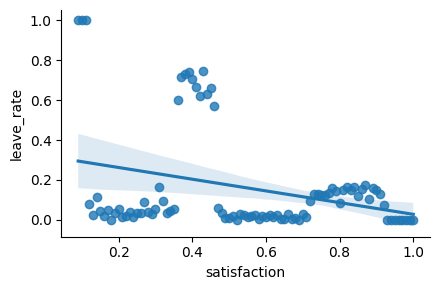

In [ ]:
leave_sat=emp_data1.groupby('satisfaction_level').agg({'left': lambda x: len(x[x==1])})
leave_sat['total']=emp_data1.groupby('satisfaction_level').agg({'left': len})

leave_sat['leave_rate']=leave_sat['left']/leave_sat['total']
leave_sat
leave_sat['satisfaction']=emp_data1.groupby('satisfaction_level').agg({'satisfaction_level': 'mean'})
# leave_sat

sns.lmplot(x='satisfaction',y='leave_rate',data=leave_sat,height=3, aspect=1.5)


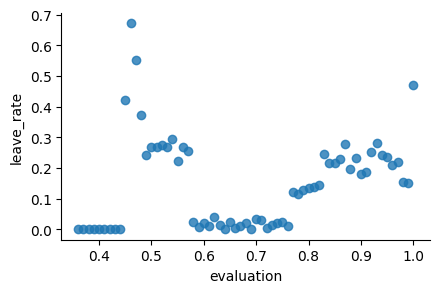

In [ ]:
leave_eval=emp_data1.groupby('eval').agg({'left': lambda x: len(x[x==1])})
leave_eval['total']=emp_data1.groupby('eval').agg({'left': len})
leave_eval['leave_rate']=leave_eval['left']/leave_eval['total']
leave_eval['evaluation']=emp_data1.groupby('eval').agg({'eval': 'mean'})
sns.lmplot(x='evaluation',y='leave_rate',data=leave_eval,fit_reg=False, height=3, aspect=1.5)

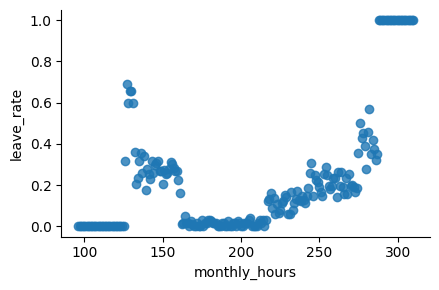

In [ ]:
leave_hours=emp_data1.groupby('hours').agg({'left': lambda x: len(x[x==1])})
leave_hours['total']=emp_data1.groupby('hours').agg({'left': len})
leave_hours['leave_rate']=leave_hours['left']/leave_hours['total']
leave_hours['monthly_hours']=emp_data1.groupby('hours').agg({'hours': 'mean'})
sns.lmplot(x='monthly_hours', y='leave_rate',data=leave_hours,fit_reg=False,height=3, aspect=1.5)

To aid with selecting numeric features, I use scatterplots.

<br>Note that I calculate the "leave_rate" by for each instance of the numerical features by dividing the number of employees that left by the total.

<br>Observations:
<br>We observe that lower satisfaction levels are associated with higher levels of turnover, as expected
<br>Regarding evaluation scores, it's interesting to note the two "clusters" that form; the people who leave tend to either have received low scores (.6 and below) or very high scores (.8 and above). Employees scoring in the middle rarely left.
<br>A similar clustering effect is shown for the weekly hours graph as well. People tend to leave when they are overworked or underworked. We also observe that the pattern we see for the weekly hours feature is similar to that of the number of projects feature.

<br>Conclusions:
<br>Use the satisfaction_level feature in our model
<br>We may need to do some data wrangling on the last_evaluation feature. Consider creating two bands, exceptional scores (both really good and really bad evaluations) vs. the rest.
<br>Given that both the hours feature and number of projects feature exhibit a comparable clustering effect and that there is a moderate correlation between these variables (.417, as calculated earlier), I will only use the number of projects feature in my model and discard the weekly hours feature for simplicity.

EXTRA

In [ ]:
emp_data1[['department', 'hours']].groupby(['department'], as_index=False).mean().sort_values(by='hours', ascending=False)


,department,hours
4,management,201.529817
1,RandD,201.291066
9,technical,201.115419
2,accounting,200.877617
0,IT,200.638320
8,support,200.627128
7,sales,200.242050
5,marketing,199.487370
3,hr,199.371048
6,product_mng,198.893586


I revisit the department feature, as I think there's something more to it.<br> In an effort to find a distinguishing element between each department, I test the relationship between an employee's department and the amount of work they do per week.<br> My hypothesis is that some departments might work their employees harder than others, which then affects a worker's likelihood of leaving.

<br>Observations:
<br>There are very minimal differences in the weekly hours worked across departments

<br>Conclusions:
<br>The department feature does not seem very useful; we will not include this in our model
